In [1]:
patid = '222_2'

In [17]:

import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator

from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
import jj_basic_fn as JJ
from sklearn import ensemble
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools

#matrix inverse
from numpy.linalg import inv

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:



features_list = ['delta', 'beta', 'low_gamma']
plot_3d_var_list = ['low_gamma2', 'beta2','all1']


## 1. Data loading

### What the data looks like

In [21]:
import pickle
data = pickle.load( open( "../data/ml_ready_data.p", "rb" ) )
# remove outliers
data = JJ.remove_outliers(data)

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

data

Total outliers removed: 68


,filename,region_start_time,delta1,delta2,delta3,...,i34,epoch,label,patid,if_stimulated
86,1.309997e+17,2016-02-14 03:59:36.960000,61.166778,273.677298,33.567358,...,0.0,0,True,222_1,False
87,1.310015e+17,2016-02-15 20:59:18.960000,40.548973,773.155101,25.976912,...,0.0,0,True,222_1,False
88,1.310019e+17,2016-02-16 20:59:12.998400,41.771439,172.179808,32.841170,...,0.0,0,True,222_1,False
89,1.310032e+17,2016-02-18 03:58:56.006400,42.171886,290.146546,36.623015,...,0.0,0,True,222_1,False
90,1.310041e+17,2016-02-19 03:58:42.960000,45.669293,290.906731,25.191819,...,0.0,0,True,222_1,False
...,...,...,...,...,...,...,...,...,...,...,...
884,1.316288e+17,2018-02-11 15:51:35.971200,104.142656,43.925946,121.402267,...,1.0,11,False,231,True
885,1.316296e+17,2018-02-11 21:51:24.998400,113.162000,50.395396,91.166914,...,1.0,11,False,231,True
886,1.316296e+17,2018-02-12 03:51:23.011200,225.536331,153.708886,189.820605,...,8.0,11,False,231,True
887,1.316296e+17,2018-02-12 09:51:21.974400,85.753303,34.006378,103.498303,...,0.0,11,False,231,True


## 2. Building Classifiers
### Fitting 7 classfier to the training data and tune the hyperparameter using 10-fold cross-validation. Evaluate the performance of each classifier using test data

### 1:'Logistic Regression' (regulation type, regulation parameter)
### 2: 'SVM' (kernel type, degreee, regulation type, regulation parameter)
### 3: 'Gaussian Naive Bayes classifier'
### 4:'Linear Discriminant Analysis'
### 5:'Decision Tree' (criterion for splliting, max depth, min sample per leaf)
### 6:'Random Forest' (criterion for splliting, number of trees, number of features used in each  tree, max depth, min sample per leaf)
### 7:'Gradient Boosting' (number of estimator, number of samples used in each estimator, max depth, min sample per leaf, learning rate)

## 3. Classifier Performance

### Performace Overview of each Classifier

In [5]:
X_train, X_test, y_train, y_test = JJ.get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)

JJ.scores_estimators(X_test, y_test, patid = patid)

,Classifier,AUC
0,SVM,0.785147
1,Logistic Regression,0.742630
2,random forest,0.742063
3,gradient boosting,0.735828
4,decision tree,0.705215


,Classifier,Accuracy
0,SVM,0.714286
1,Logistic Regression,0.702381
2,decision tree,0.690476
3,gradient boosting,0.654762
4,random forest,0.630952


### The confusion matrix and ROC of SVM(rbf kernel) (the best classifier in this case)

Confusion matrix, without normalization


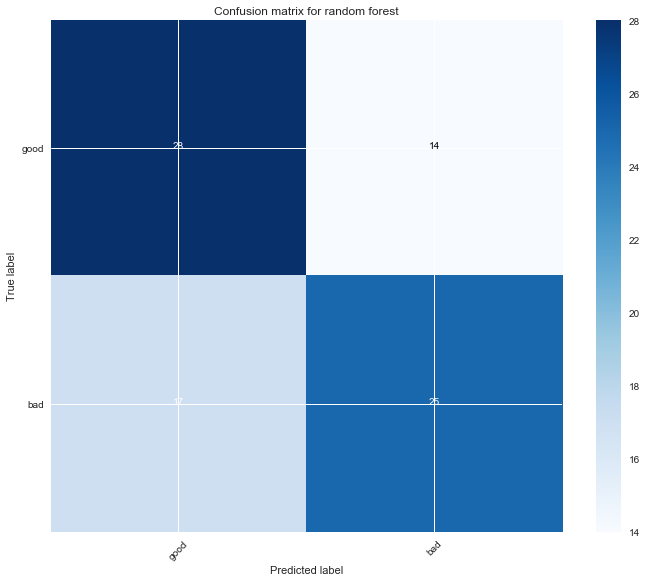

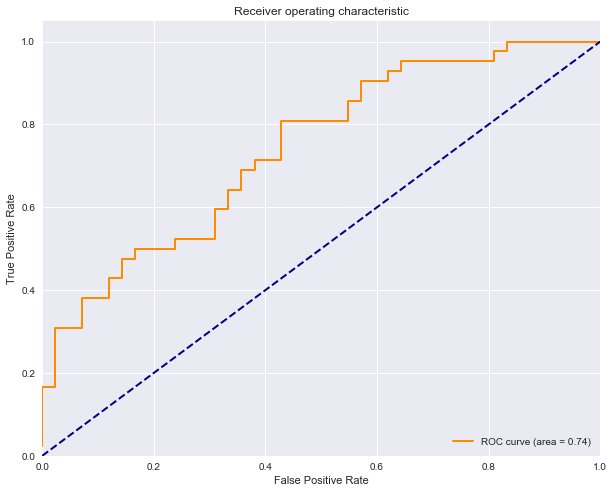

In [6]:
X_train, X_test, y_train, y_test = JJ.get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)

JJ.estimator_performance(6, X_test, y_test, patid = patid, if_plot_c = 1, if_plot_roc = 1)

### ROC curve for all classifiers

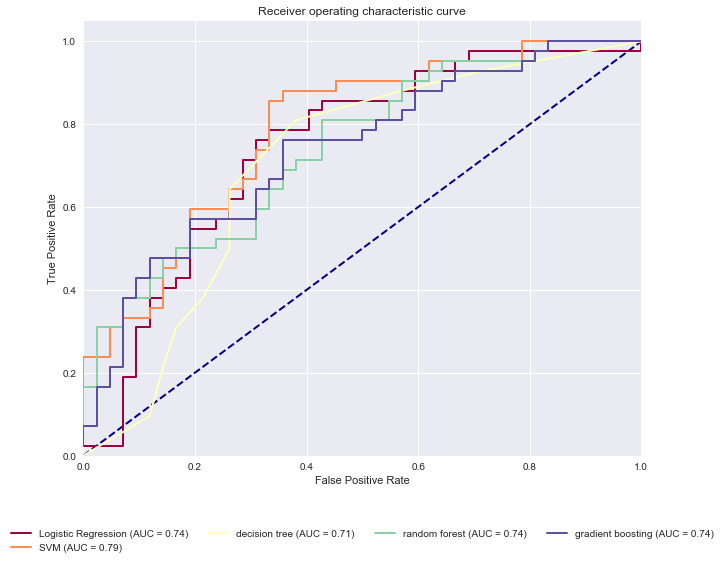

In [7]:
JJ.plot_roc_all(X_test, y_test, patid = patid)

### Ensemble SVM, Logistic Regression, Random Forest and Gradient Boosting using hard vote

In [8]:

X_train, X_test, y_train, y_test = JJ.get_ml_data(data, patid, if_scaler = 1, if_remove_icd = 1)
#parameter_tuning(X_train, X_test, y_train, y_test, classifier = 1, C_range_num = 100, if_save = 1)

print("The accuracy for ensemble model is")
JJ.ensemble_model(X_train, y_train, X_test, y_test, patid = patid,if_save = 0)

The accuracy for ensemble model is
0.654761904762


## 4. Feature Importance

### Feature Importance for Logistic regression

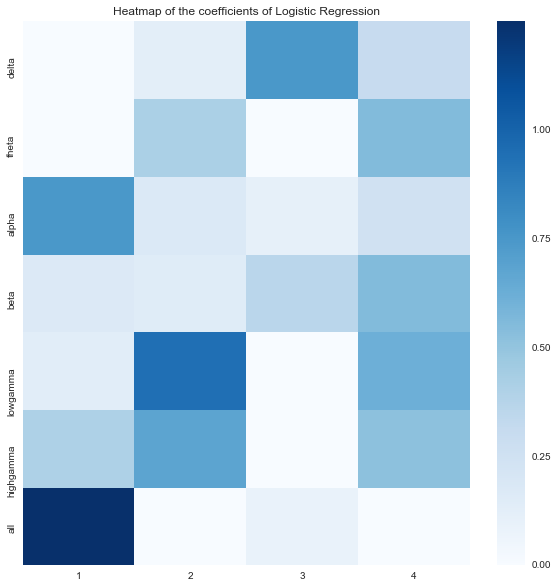

In [9]:
import matplotlib.pyplot as plt

prepath = '../estimators/'+patid + '/'
classifier_int = 1
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open(prepath + 'best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.coef_.reshape(7,4))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all'][::-1]
channel = ['1', '2', '3', '4']
df = pd.DataFrame(coef, index = powerband, columns = channel)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the coefficients of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
plt.show()

### Feature Importance for Gradient Boosting

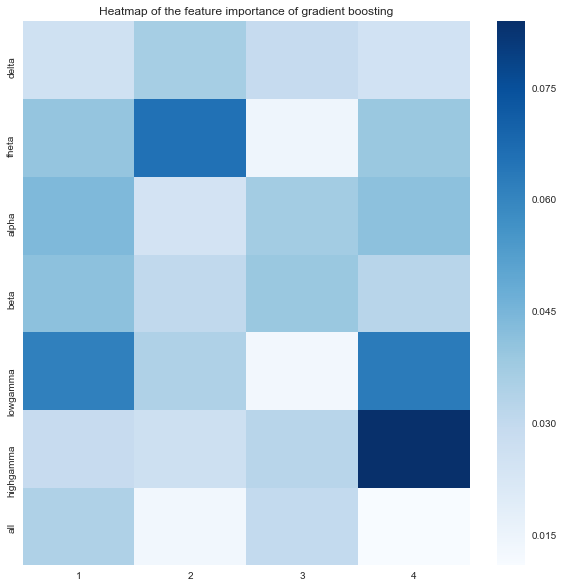

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
prepath = '../estimators/'+patid + '/'
classifier_int = 7
int2name = {1:'Logistic Regression', 2: 'SVM', 3: 'Gaussian Naive Bayes classifier', 4:'Linear Discriminant Analysis', 5:'decision tree', 6:'random forest', 7:'gradient boosting'}
clf_name = int2name[classifier_int]
clf = pickle.load(open(prepath + 'best_estimator_for_' + str(clf_name) + '.p', "rb" ))
coef = np.abs(clf.feature_importances_.reshape(7,4))
powerband = ['delta', 'theta', 'alpha', 'beta', 'lowgamma', 'highgamma', 'all'][::-1]
channel = ['4', '3', '2', '1'][::-1]
df = pd.DataFrame(coef, index = powerband, columns = channel)
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(10,10))
r = sns.heatmap(coef, cmap = "Blues")
r.set_title("Heatmap of the feature importance of {}".format(clf_name))
ax.set_yticklabels(df.index)
ax.set_xticklabels(df.columns)
sns.plt.show()

## 5. Data visualization

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch. 

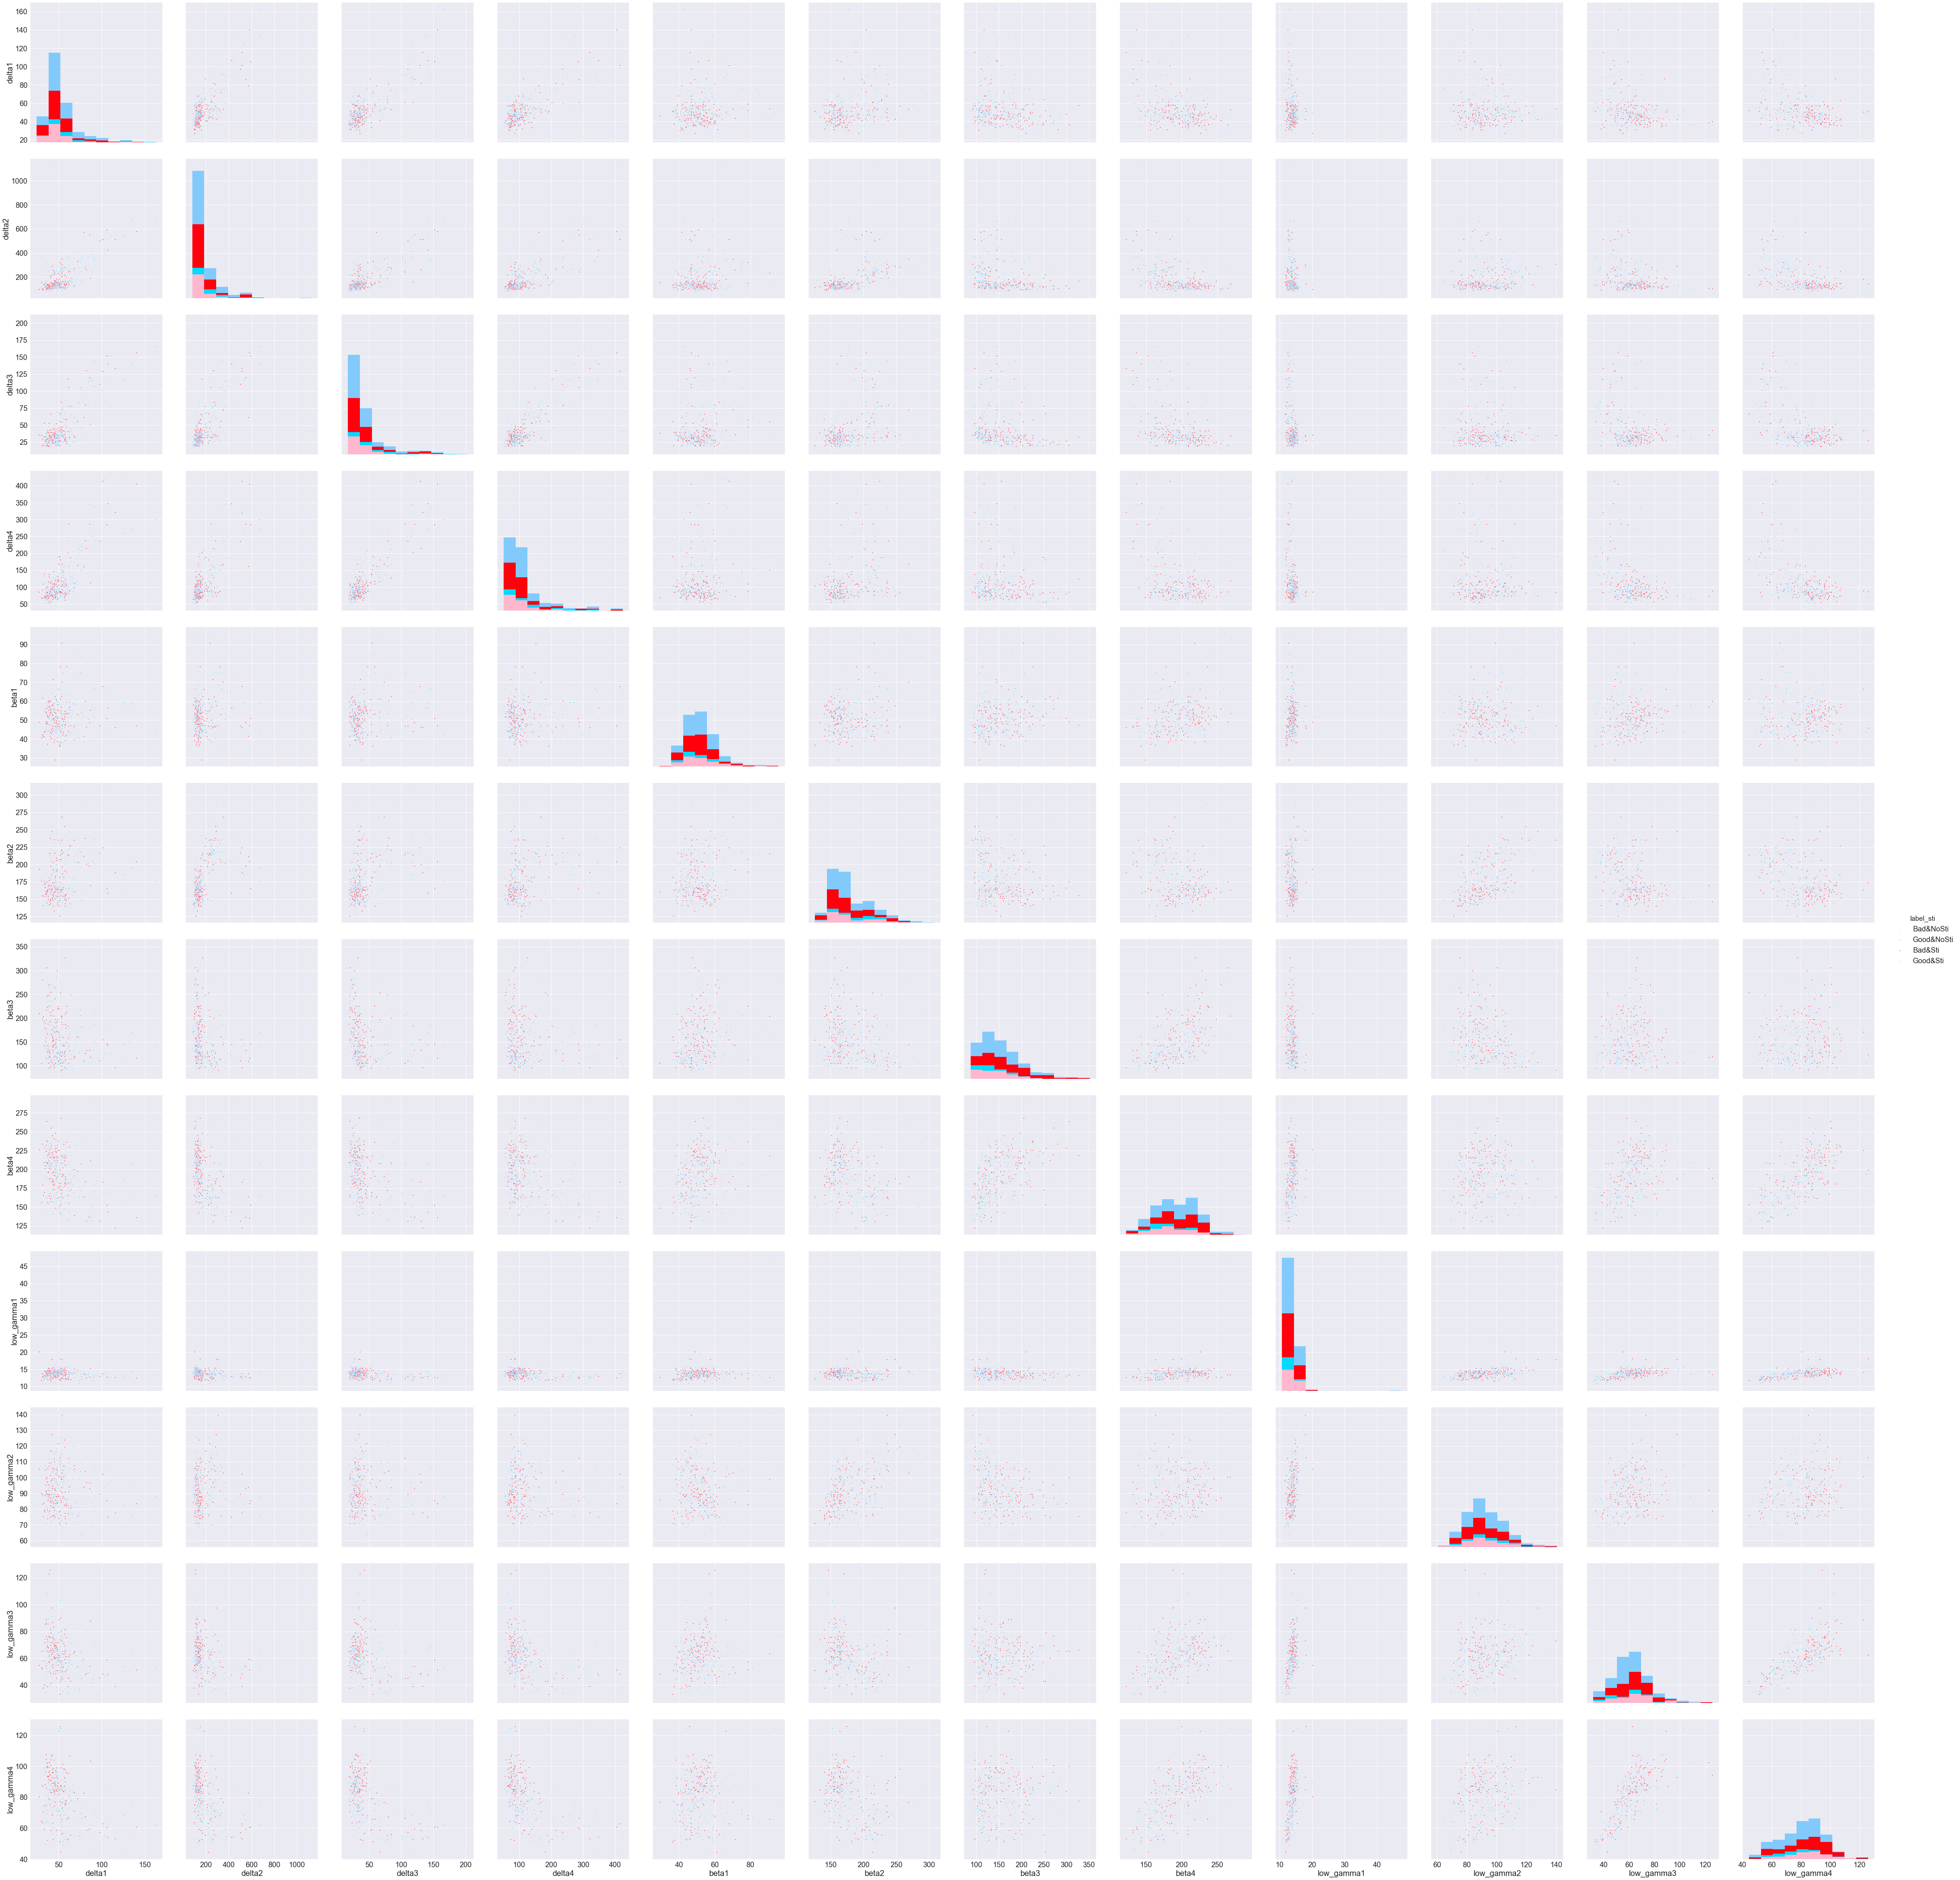

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_ml = JJ.get_scatter_plot_data(data, patid)
sns.set(font_scale=2)
colors = ["baby pink", "neon blue", "bright red", "sky"]
g = sns.pairplot(data_ml, hue="label_sti", size = 6, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.xkcd_palette(colors))
plt.show()

### 3D scatter plot

<IPython.core.display.Javascript object>


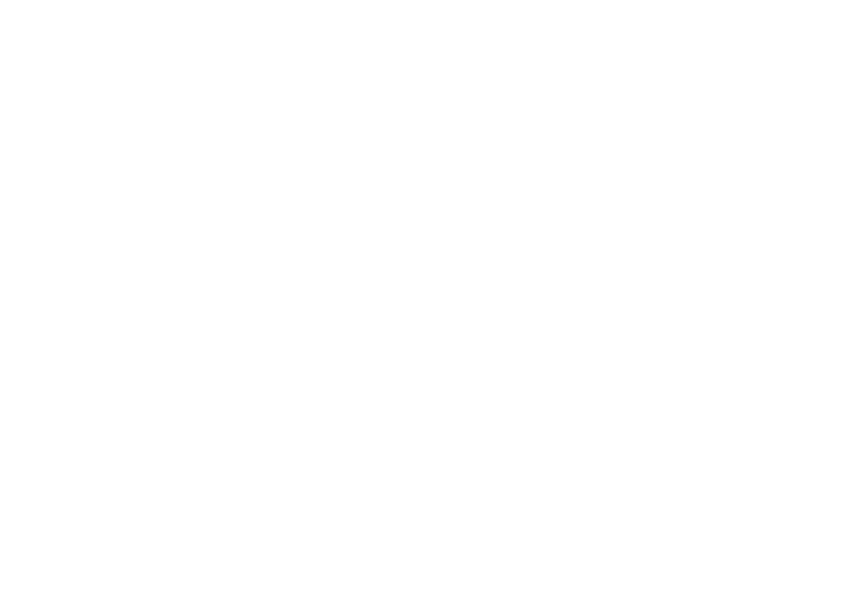

<IPython.core.display.Javascript object>


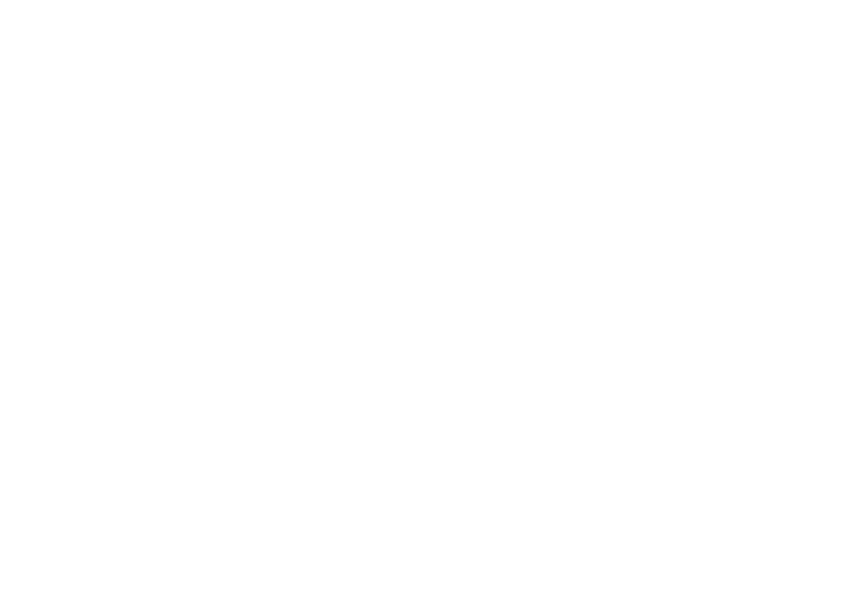

In [12]:
%matplotlib notebook
sns.set(font_scale=1)

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
